In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder ## Used to turn out type label to numeric
from sklearn.model_selection import train_test_split
from collections import Counter ## Used to help check if Oversampling was correctly applied
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
## Model Imports Below
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB ## Tested out multiple Naive Bayes models
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('./bird.csv')

In [3]:
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


/home/msc1/anaconda3/envs/Env-7143COMP/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ulnal', ylabel='Density'>

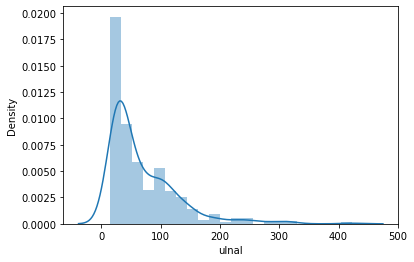

In [4]:
sns.distplot(df['ulnal'])

Countplot

In [5]:
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


<AxesSubplot:xlabel='type', ylabel='count'>

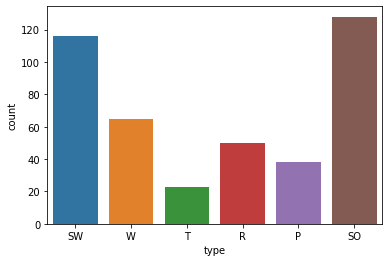

In [6]:
sns.countplot(x='type',data=df)

<AxesSubplot:xlabel='huml', ylabel='humw'>

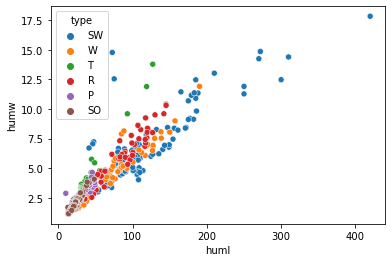

In [7]:
sns.scatterplot(x='huml', y='humw', data=df, hue='type')

In [8]:
## sns.pairplot(df, hue='type')
## Takes forever to load when rerunning entire Kernel

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,420.0,209.500000,121.387808,0.00,104.7500,209.500,314.250,419.00
huml,419.0,64.650501,53.834549,9.85,25.1700,44.180,90.310,420.00
humw,419.0,4.370573,2.854617,1.14,2.1900,3.500,5.810,17.84
ulnal,417.0,69.115372,58.784775,14.09,28.0500,43.710,97.520,422.00
ulnaw,418.0,3.597249,2.186747,1.00,1.8700,2.945,4.770,12.00
feml,418.0,36.872416,19.979082,11.83,21.2975,31.130,47.120,117.07
femw,419.0,3.220883,2.023581,0.93,1.7150,2.520,4.135,11.64
tibl,418.0,64.662823,37.838145,5.50,36.4175,52.120,82.870,240.00
tibw,419.0,3.182339,2.080827,0.87,1.5650,2.490,4.255,11.03
tarl,419.0,39.229976,23.184313,7.77,23.0350,31.740,50.250,175.00


In [10]:
df.corr()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
id,1.000000,-0.637165,-0.612314,-0.564029,-0.644609,-0.439659,-0.521161,-0.549718,-0.576338,-0.382144,-0.512848
huml,-0.637165,1.000000,0.916572,0.976377,0.887025,0.771054,0.850474,0.826899,0.869339,0.695027,0.751122
humw,-0.612314,0.916572,1.000000,0.900770,0.957790,0.871023,0.936179,0.820093,0.901478,0.676207,0.892047
ulnal,-0.564029,0.976377,0.900770,1.000000,0.871604,0.759309,0.837922,0.761994,0.818507,0.653622,0.737557
ulnaw,-0.644609,0.887025,0.957790,0.871604,1.000000,0.826243,0.898133,0.797017,0.870392,0.642814,0.870590
feml,-0.439659,0.771054,0.871023,0.759309,0.826243,1.000000,0.944668,0.859952,0.904081,0.832182,0.869299
femw,-0.521161,0.850474,0.936179,0.837922,0.898133,0.944668,1.000000,0.868170,0.959632,0.778986,0.901852
tibl,-0.549718,0.826899,0.820093,0.761994,0.797017,0.859952,0.868170,1.000000,0.928618,0.922262,0.736695
tibw,-0.576338,0.869339,0.901478,0.818507,0.870392,0.904081,0.959632,0.928618,1.000000,0.825557,0.855164
tarl,-0.382144,0.695027,0.676207,0.653622,0.642814,0.832182,0.778986,0.922262,0.825557,1.000000,0.605585


In [11]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='type', ylabel='count'>

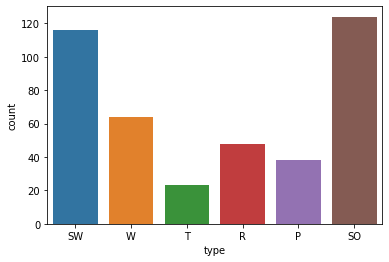

In [12]:
sns.countplot(x='type',data=df)

In [13]:
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      413 non-null    int64  
 1   huml    413 non-null    float64
 2   humw    413 non-null    float64
 3   ulnal   413 non-null    float64
 4   ulnaw   413 non-null    float64
 5   feml    413 non-null    float64
 6   femw    413 non-null    float64
 7   tibl    413 non-null    float64
 8   tibw    413 non-null    float64
 9   tarl    413 non-null    float64
 10  tarw    413 non-null    float64
 11  type    413 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 58.1+ KB


In [15]:
df.drop('id', axis=1, inplace=True)

inplace=True required to make the change permanent otherwise ID column keeps coming back

In [16]:
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [17]:
df.dtypes

huml     float64
humw     float64
ulnal    float64
ulnaw    float64
feml     float64
femw     float64
tibl     float64
tibw     float64
tarl     float64
tarw     float64
type      object
dtype: object

In [18]:
df.mean(0,1)

/home/msc1/anaconda3/envs/Env-7143COMP/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


huml     64.874867
humw      4.381235
ulnal    69.197409
ulnaw     3.606538
feml     36.822446
femw      3.221768
tibl     64.615642
tibw      3.182324
tarl     39.309806
tarw      2.944891
dtype: float64

In [19]:
df.columns

Index(['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw',
       'tarl', 'tarw', 'type'],
      dtype='object')

In [20]:
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [21]:
df.corr()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
huml,1.000000,0.916465,0.976302,0.886382,0.772928,0.851821,0.826752,0.870407,0.694274,0.750388
humw,0.916465,1.000000,0.900621,0.957503,0.871638,0.936673,0.819305,0.901130,0.674950,0.891632
ulnal,0.976302,0.900621,1.000000,0.871027,0.759996,0.838314,0.761361,0.818657,0.652631,0.737225
ulnaw,0.886382,0.957503,0.871027,1.000000,0.826120,0.898089,0.796206,0.870106,0.640893,0.870153
feml,0.772928,0.871638,0.759996,0.826120,1.000000,0.943860,0.860877,0.903487,0.831127,0.869033
femw,0.851821,0.936673,0.838314,0.898089,0.943860,1.000000,0.868204,0.959316,0.777503,0.901419
tibl,0.826752,0.819305,0.761361,0.796206,0.860877,0.868204,1.000000,0.928755,0.922619,0.736449
tibw,0.870407,0.901130,0.818657,0.870106,0.903487,0.959316,0.928755,1.000000,0.825158,0.854591
tarl,0.694274,0.674950,0.652631,0.640893,0.831127,0.777503,0.922619,0.825158,1.000000,0.603728
tarw,0.750388,0.891632,0.737225,0.870153,0.869033,0.901419,0.736449,0.854591,0.603728,1.000000


<AxesSubplot:xlabel='type', ylabel='huml'>

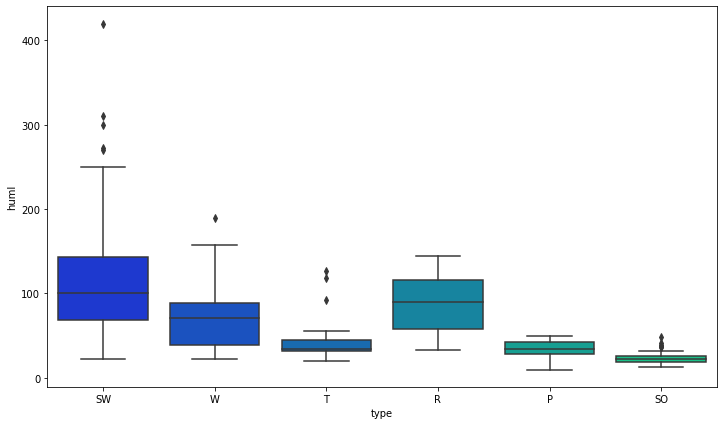

In [22]:
plt.figure(figsize=(12,7))
sns.boxplot(x='type',y='huml', data=df,palette='winter')

In [23]:
smote = SMOTE()

In [24]:
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [25]:
df.value_counts('type')

type
SO    124
SW    116
W      64
R      48
P      38
T      23
dtype: int64

Encoding our classes ('type' column) so that our models can have an easier time with the data

In [26]:
enc = LabelEncoder()
x = df
x.loc[:,['type']] = x.loc[:,['type']].apply(enc.fit_transform)
x.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


Encoding type label from string to int values

In [27]:
df.value_counts('type')

type
2    124
3    116
5     64
1     48
0     38
4     23
dtype: int64

SO = 2
SW = 3
W  = 5
R  = 1 
P  = 0
T  = 4

Assigning y to be our independent variable which is the our classifcation of 'type'

In [28]:
x = df.drop('type', axis=1)
y = df['type']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   huml    413 non-null    float64
 1   humw    413 non-null    float64
 2   ulnal   413 non-null    float64
 3   ulnaw   413 non-null    float64
 4   feml    413 non-null    float64
 5   femw    413 non-null    float64
 6   tibl    413 non-null    float64
 7   tibw    413 non-null    float64
 8   tarl    413 non-null    float64
 9   tarw    413 non-null    float64
 10  type    413 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 54.9 KB


Train/Test Split, test_size=0.3 seemed to provide better results for the eventual chosen Model (SVM), 
whilst at 0.2 it appeared to improve the other models results slightly but reduced SVM effectiveness.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [31]:
print("Before:" , Counter(y_train))
print("After:" , Counter(y_train_smote))
## Checking if SMOTE (Oversampling) was done correctly

Before: Counter({2: 87, 3: 81, 5: 45, 1: 33, 0: 27, 4: 16})
After: Counter({3: 87, 0: 87, 2: 87, 1: 87, 4: 87, 5: 87})


In [32]:
scaler = preprocessing.StandardScaler().fit_transform(x_train_smote[x_train_smote.columns])

DecisionTree, used without oversampled data and then with oversampled data to ensure resampling done correctly - by seeing if there is an improvement.

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
predictions = dtree.predict(x_test)

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.80      0.53      0.64        15
           2       0.92      0.92      0.92        37
           3       0.66      0.77      0.71        35
           4       0.36      0.57      0.44         7
           5       0.38      0.26      0.31        19

    accuracy                           0.69       124
   macro avg       0.62      0.62      0.61       124
weighted avg       0.69      0.69      0.68       124



In [36]:
print(confusion_matrix(y_test,predictions))

[[ 7  0  0  1  2  1]
 [ 0  8  0  2  3  2]
 [ 1  0 34  0  2  0]
 [ 2  1  1 27  0  4]
 [ 0  1  1  0  4  1]
 [ 2  0  1 11  0  5]]


Decision Tree Post SMOTE:

In [37]:
dtree.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier()

In [38]:
predictions = dtree.predict(x_test)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.79      0.73      0.76        15
           2       0.92      0.92      0.92        37
           3       0.69      0.83      0.75        35
           4       1.00      0.57      0.73         7
           5       0.31      0.21      0.25        19

    accuracy                           0.74       124
   macro avg       0.74      0.70      0.70       124
weighted avg       0.73      0.74      0.73       124



In [40]:
print(confusion_matrix(y_test,predictions))

[[10  0  0  0  0  1]
 [ 0 11  0  1  0  3]
 [ 1  0 34  0  0  2]
 [ 1  1  1 29  0  3]
 [ 0  2  1  0  4  0]
 [ 2  0  1 12  0  4]]


SVM Model:

In [41]:

second_model = SVC(kernel='linear', random_state=42)
## RBF results awful, linear seems to provide strongest.

In [42]:
second_model.fit(x_train_smote, y_train_smote)

SVC(kernel='linear', random_state=42)

In [43]:
predictions = second_model.predict(x_test)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.77      0.67      0.71        15
           2       0.92      0.95      0.93        37
           3       0.80      0.91      0.85        35
           4       0.75      0.86      0.80         7
           5       0.92      0.63      0.75        19

    accuracy                           0.83       124
   macro avg       0.81      0.79      0.79       124
weighted avg       0.84      0.83      0.83       124



In [45]:
print(confusion_matrix(y_test,predictions))

[[ 8  1  1  0  0  1]
 [ 1 10  0  2  2  0]
 [ 2  0 35  0  0  0]
 [ 0  1  2 32  0  0]
 [ 1  0  0  0  6  0]
 [ 0  1  0  6  0 12]]


Naive Bayes Model:

In [46]:
## third_model = GaussianNB()
third_model = MultinomialNB() ## Seems to provide best results
## third_model = CategoricalNB() - Recieve and Index out of bound for axis 1 error when using this.
third_model.fit(x_train_smote, y_train_smote)

MultinomialNB()

In [47]:
predictions = third_model.predict(x_test)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.16      0.27      0.20        11
           1       0.45      0.33      0.38        15
           2       0.87      0.89      0.88        37
           3       0.54      0.40      0.46        35
           4       0.80      0.57      0.67         7
           5       0.28      0.37      0.32        19

    accuracy                           0.53       124
   macro avg       0.52      0.47      0.48       124
weighted avg       0.57      0.53      0.54       124



In [49]:
print(confusion_matrix(y_test,predictions))

[[ 3  4  1  2  1  0]
 [ 5  5  2  2  0  1]
 [ 4  0 33  0  0  0]
 [ 0  2  2 14  0 17]
 [ 3  0  0  0  4  0]
 [ 4  0  0  8  0  7]]


Logistic Regression Model:

In [50]:
fourth_model = LogisticRegression(random_state=42, solver='newton-cg', warm_start=True, class_weight='balanced') 
## 'newton-cg', 'sag' and 'lbfgs' used to handle multi-class problems

In [51]:
fourth_model.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg',
                   warm_start=True)

In [52]:
predictions = fourth_model.predict(x_test)

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.92      0.73      0.81        15
           2       0.92      0.97      0.95        37
           3       0.77      0.86      0.81        35
           4       0.75      0.86      0.80         7
           5       0.71      0.53      0.61        19

    accuracy                           0.81       124
   macro avg       0.79      0.78      0.78       124
weighted avg       0.81      0.81      0.81       124



Classification Scores:
Newton-Cg: P - 0.81 R - 0.83
Sag: P - 0.53 R - 0.6
lbfgs: P - 0.73 R - 0.73 

In [54]:
print(confusion_matrix(y_test,predictions))

[[ 8  0  1  1  1  0]
 [ 1 11  0  1  1  1]
 [ 1  0 36  0  0  0]
 [ 1  0  1 30  0  3]
 [ 0  0  1  0  6  0]
 [ 1  1  0  7  0 10]]
